In [274]:
import statsmodels.api as sm
from pylab import rcParams

import os

import itertools
import pytz
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib

from sklearn import cluster
from random import randint

In [275]:
p = sns.crayon_palette(["Midnight Blue", "Maroon"])

sns.color_palette(p, as_cmap=True)
sns.set_palette(p)

In [276]:
path_data = "../../data"

filename_entete = "entete.csv"

# équivalent à path_data + filename_meteo et s'assure que le path est de la bonne forme
path_data_entete = os.path.join(path_data, filename_entete)
# affiche le chemin path_data_meteo
print(path_data_entete)

../../data/entete.csv


In [277]:
df_entete_base = pd.read_csv(path_data_entete, sep=",")

df_entete = df_entete_base.loc[
    (df_entete_base["TypCde"] == "C") & (df_entete_base["CAHT"] > 0)
]

df_entete = df_entete[{"DateCreation", "CAHT"}].sort_values("DateCreation")
df_entete["DateCreation"] = pd.to_datetime(df_entete["DateCreation"])

df_entete = df_entete.loc[
    (df_entete["DateCreation"] >= "2018-04-01") & (df_entete["DateCreation"] < "2022-01-01")
]

df_entete

,DateCreation,CAHT
15489,2019-01-10,26.56
15493,2019-01-10,586.80
15445,2019-01-10,118.00
15446,2019-01-10,223.00
15451,2019-01-10,900.74
...,...,...
62150,2021-09-09,830.02
62162,2021-09-09,458.50
62623,2021-09-09,1504.26
62890,2021-09-09,477.31


In [278]:
df_entete_bois = df_entete_base.loc[
    (df_entete_base["TypCde"] == "C") & (df_entete_base["CAHT"] > 0) & (df_entete_base["Gestionnaire"] == "BOIS")
]

df_entete_bois = df_entete_bois[{"DateCreation", "CAHT"}].sort_values("DateCreation")
df_entete_bois["DateCreation"] = pd.to_datetime(df_entete_bois["DateCreation"])

df_entete_bois = df_entete_bois.loc[
    (df_entete_bois["DateCreation"] >= "2018-04-01") & (df_entete_bois["DateCreation"] < "2022-01-01")
]

df_entete_bois

,DateCreation,CAHT
11407,2019-01-10,528.29
11527,2019-01-10,510.39
15289,2019-01-10,318.06
15467,2019-01-10,323.95
15517,2019-01-10,460.62
...,...,...
62458,2021-09-09,835.65
61949,2021-09-09,1245.84
62199,2021-09-09,546.56
62890,2021-09-09,477.31


In [279]:
df_entete_alu = df_entete_base.loc[
    (df_entete_base["TypCde"] == "C") & (df_entete_base["CAHT"] > 0) & (df_entete_base["Gestionnaire"] == "ALU")
]

df_entete_alu = df_entete_alu[{"DateCreation", "CAHT"}].sort_values("DateCreation")
df_entete_alu["DateCreation"] = pd.to_datetime(df_entete_alu["DateCreation"])

df_entete_alu = df_entete_alu.loc[
    (df_entete_alu["DateCreation"] >= "2018-04-01") & (df_entete_alu["DateCreation"] < "2022-01-01")
]

df_entete_alu

,DateCreation,CAHT
15509,2019-01-10,18.86
15508,2019-01-10,43.28
15507,2019-01-10,19.00
15505,2019-01-10,90.00
15504,2019-01-10,27.71
...,...,...
62903,2021-09-09,892.74
62150,2021-09-09,830.02
62914,2021-09-09,1190.65
57502,2021-09-09,861.98


In [280]:
df_entete_pvc = df_entete_base.loc[
    (df_entete_base["TypCde"] == "C") & (df_entete_base["CAHT"] > 0) & (df_entete_base["Gestionnaire"] == "PVC")
]

df_entete_pvc = df_entete_pvc[{"DateCreation", "CAHT"}].sort_values("DateCreation")
df_entete_pvc["DateCreation"] = pd.to_datetime(df_entete_pvc["DateCreation"])

df_entete_pvc = df_entete_pvc.loc[
    (df_entete_pvc["DateCreation"] >= "2018-04-01") & (df_entete_pvc["DateCreation"] < "2022-01-01")
]

df_entete_pvc

,DateCreation,CAHT
15476,2019-01-10,2673.00
15453,2019-01-10,141.75
13904,2019-01-10,491.84
15451,2019-01-10,900.74
15446,2019-01-10,223.00
...,...,...
62484,2021-09-09,512.29
60304,2021-09-09,516.60
62871,2021-09-09,394.20
62854,2021-09-09,904.80


In [281]:
df_entete_pvc

,DateCreation,CAHT
15476,2019-01-10,2673.00
15453,2019-01-10,141.75
13904,2019-01-10,491.84
15451,2019-01-10,900.74
15446,2019-01-10,223.00
...,...,...
62484,2021-09-09,512.29
60304,2021-09-09,516.60
62871,2021-09-09,394.20
62854,2021-09-09,904.80


In [282]:
df_entete = df_entete.groupby(df_entete["DateCreation"].dt.to_period('M')).agg('sum')
df_entete

,CAHT
DateCreation,
2018-04,415779.51
2018-05,387947.17
2018-06,527762.19
2018-07,445984.64
2018-08,127902.62
2018-09,363044.51
2018-10,445504.32
2018-11,551325.12
2018-12,243708.22


In [283]:
df_entete_alu = df_entete_alu.groupby(df_entete_alu["DateCreation"].dt.to_period('M')).agg('sum')
df_entete_alu

,CAHT
DateCreation,
2018-04,241651.00
2018-05,216018.47
2018-06,309865.61
2018-07,264982.09
2018-08,90045.25
2018-09,220095.07
2018-10,204581.89
2018-11,344930.87
2018-12,122759.03


In [284]:
df_entete_bois = df_entete_bois.groupby(df_entete_bois["DateCreation"].dt.to_period('M')).agg('sum')
df_entete_bois

,CAHT
DateCreation,
2018-04,62839.22
2018-05,63368.52
2018-06,83120.39
2018-07,53736.10
2018-08,11298.44
2018-09,68860.18
2018-10,101931.22
2018-11,101712.96
2018-12,46834.40


In [285]:
df_entete_pvc = df_entete_pvc.groupby(df_entete_pvc["DateCreation"].dt.to_period('M')).agg('sum')
df_entete_pvc

,CAHT
DateCreation,
2018-04,111289.29
2018-05,108560.18
2018-06,134776.19
2018-07,127266.45
2018-08,26558.93
2018-09,74089.26
2018-10,138991.21
2018-11,104681.29
2018-12,74114.79


In [177]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
print(seasonal_pdq)

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [172]:
import warnings

aics = []

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=df_entete,
                                            trend='n',
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod.fit(disp=0)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aics.append(results.aic)
        except:
            continue

print("Best: ", min(aics))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:22556.633485354105
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:22414.42044150819
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:22236.210129361287
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:21687.816850460284
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:22266.580689838294
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:21956.853911765524
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:21934.97354078868
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:21688.552010678206
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:22364.910441059405
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:22305.45563934482
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:22234.92655946809
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:21664.531081541118
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:22258.976453287123
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:22094.039276079624
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:21977.75206405184
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:21819.148686946915
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:22437.20083697565
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:22439.77726752003

In [203]:
aics_alu = []

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_alu = sm.tsa.statespace.SARIMAX(endog=df_entete_alu,
                                            trend='n',
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod_alu.fit(disp=0)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aics_alu.append(results.aic)
        except:
            continue

print("Best: ", min(aics_alu))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1366.2549176061286
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1349.9518705518485
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:983.5074722091241
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:983.8756485649468
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1324.2515629006036
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1332.3587970304502
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:983.5105371243058
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:985.8110857212403
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1345.6001327258373
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1343.3597670293198
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:979.0140562845954
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:978.838095580729
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1341.265801782206
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1342.7316348340305
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:978.1389124105087
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:980.1317775335068
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1276.041298550358
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1283.712972821604
ARIM

In [204]:
aics_bois = []

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_bois = sm.tsa.statespace.SARIMAX(endog=df_entete_bois,
                                                trend='n',
                                                order=param,
                                                seasonal_order=param_seasonal)

            results = mod_bois.fit(disp=0)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aics_bois.append(results.aic)
        except:
            continue

print("Best: ", min(aics_bois))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1217.5234029262215
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1192.0734669102303
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:850.6822261818371
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:847.7613089826186
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1155.6087722224147
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1150.8592263288078
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:848.0318114345582
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:849.7181106525189
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1194.6967906981133
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1190.66929637141
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:845.9872485427412
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:845.2403875695043
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1188.4720822596905
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1190.1241960637462
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:845.657495202958
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:847.2389903363271
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1122.186859210359
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1128.9467380091146
ARIM

In [205]:
aics_pvc = []

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_pvc = sm.tsa.statespace.SARIMAX(endog=df_entete_pvc,
                                                trend='n',
                                                order=param,
                                                seasonal_order=param_seasonal)

            results = mod_pvc.fit(disp=0)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aics_alu.append(results.aic)
        except:
            continue

print("Best: ", min(aics_pvc))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1252.2995673237388
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1227.6351802886034
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:868.9024270962454
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:862.1901705976227
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1181.7293722047384
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1177.260464697385
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:860.3491490813722
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:862.3282679063389
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1229.0705355246141
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1225.0221723234224
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:866.8969410943579
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:862.3639609720051
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1222.4259937031297
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1224.0336100985435
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:861.3162280940919
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:863.2688732754975
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1143.5184186697666
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1140.0352083948997
A

ValueError: min() arg is an empty sequence

In [286]:
df_entete = df_entete.sort_values(by="DateCreation")
df_entete

,CAHT
DateCreation,
2018-04,415779.51
2018-05,387947.17
2018-06,527762.19
2018-07,445984.64
2018-08,127902.62
2018-09,363044.51
2018-10,445504.32
2018-11,551325.12
2018-12,243708.22


In [287]:
df_entete_alu = df_entete_alu.sort_values(by="DateCreation")
df_entete_alu

,CAHT
DateCreation,
2018-04,241651.00
2018-05,216018.47
2018-06,309865.61
2018-07,264982.09
2018-08,90045.25
2018-09,220095.07
2018-10,204581.89
2018-11,344930.87
2018-12,122759.03


In [288]:
df_entete_bois = df_entete_bois.sort_values(by="DateCreation")
df_entete_bois

,CAHT
DateCreation,
2018-04,62839.22
2018-05,63368.52
2018-06,83120.39
2018-07,53736.10
2018-08,11298.44
2018-09,68860.18
2018-10,101931.22
2018-11,101712.96
2018-12,46834.40


In [289]:
df_entete_pvc = df_entete_pvc.sort_values(by="DateCreation")
df_entete_pvc

,CAHT
DateCreation,
2018-04,111289.29
2018-05,108560.18
2018-06,134776.19
2018-07,127266.45
2018-08,26558.93
2018-09,74089.26
2018-10,138991.21
2018-11,104681.29
2018-12,74114.79


In [290]:
mod = sm.tsa.statespace.SARIMAX(df_entete,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()



mod_alu = sm.tsa.statespace.SARIMAX(df_entete_alu,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results_alu = mod_alu.fit()



mod_bois = sm.tsa.statespace.SARIMAX(df_entete_bois,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results_bois = mod_bois.fit()



mod_pvc = sm.tsa.statespace.SARIMAX(df_entete_pvc,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results_pvc = mod_pvc.fit()

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69334D+00    |proj g|=  2.57420D-01

At iterate    5    f=  9.61299D+00    |proj g|=  1.23546D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      6      1     0     0   1.235D-06   9.613D+00
  F =   9.6129911892746112     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.


# TOTAL

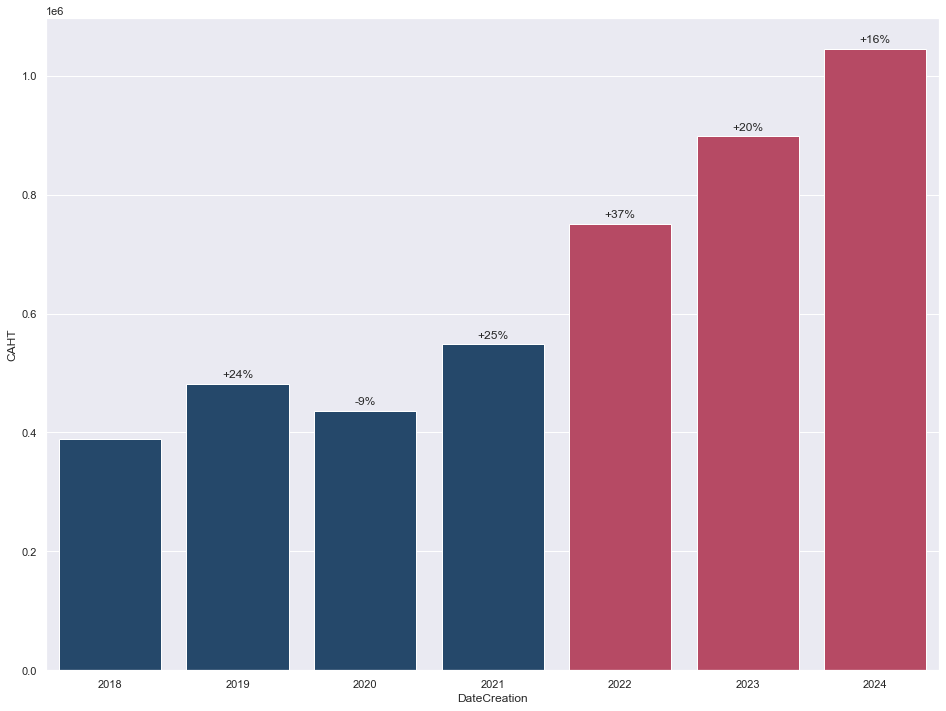

In [411]:
df_real = df_entete.reset_index()

df_predict = results.get_forecast(steps=36).predicted_mean.reset_index()
df_predict = df_predict.rename(columns={"index": "DateCreation", "predicted_mean": "CAHT"})

df_total = df_real.append(df_predict, ignore_index=True)
df_total["DateCreation"] = df_total["DateCreation"].apply(lambda x: x.year)
df_total = df_total.groupby("DateCreation").mean().reset_index()

sns.set(rc={'figure.figsize':(16, 12)})
colors = ['#194876' if (x <= 2021) else '#c8385b' for x in df_total["DateCreation"]]
plot = sns.barplot(data=df_total, x="DateCreation", y="CAHT", color="orange", palette=colors)

for x in range(len(plot.patches) - 1):
    x += 1
    label = round(-(1 - round(plot.patches[x].get_height() / plot.patches[x - 1].get_height(), 2)) * 100)
    label = "{0:+.0f}".format(label)
    label = f"{label}%"

    plot.annotate(
        format(label),
        (plot.patches[x].get_x() + plot.patches[x].get_width() / 2., plot.patches[x].get_height()),
        ha='center', va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

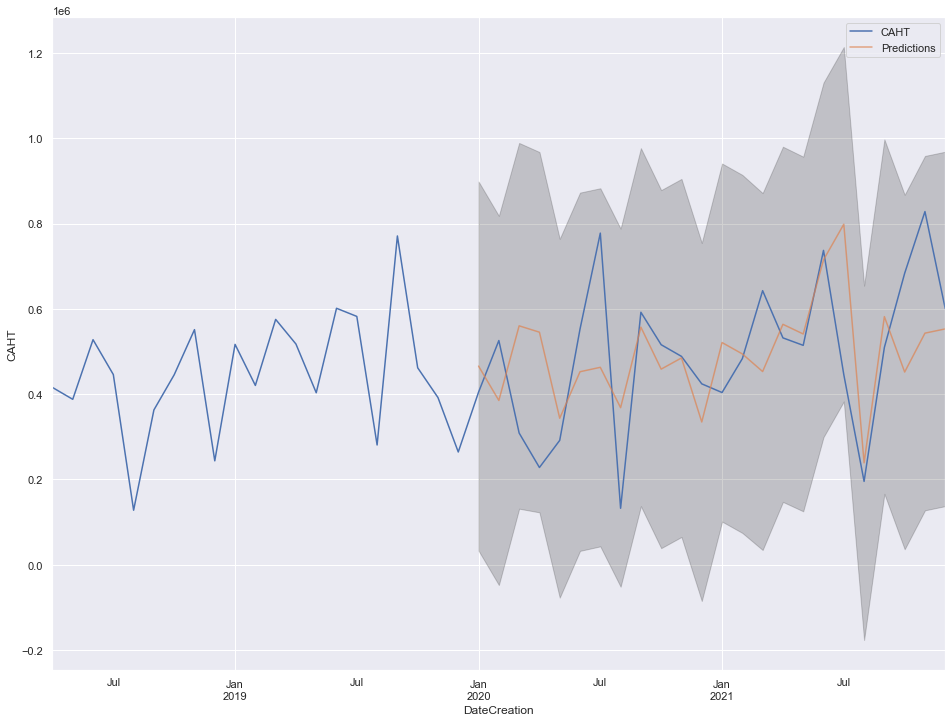

In [349]:
start_forecast = 21
pred = results.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = df_entete.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('DateCreation')
ax.set_ylabel('CAHT')
plt.legend()

plt.show()

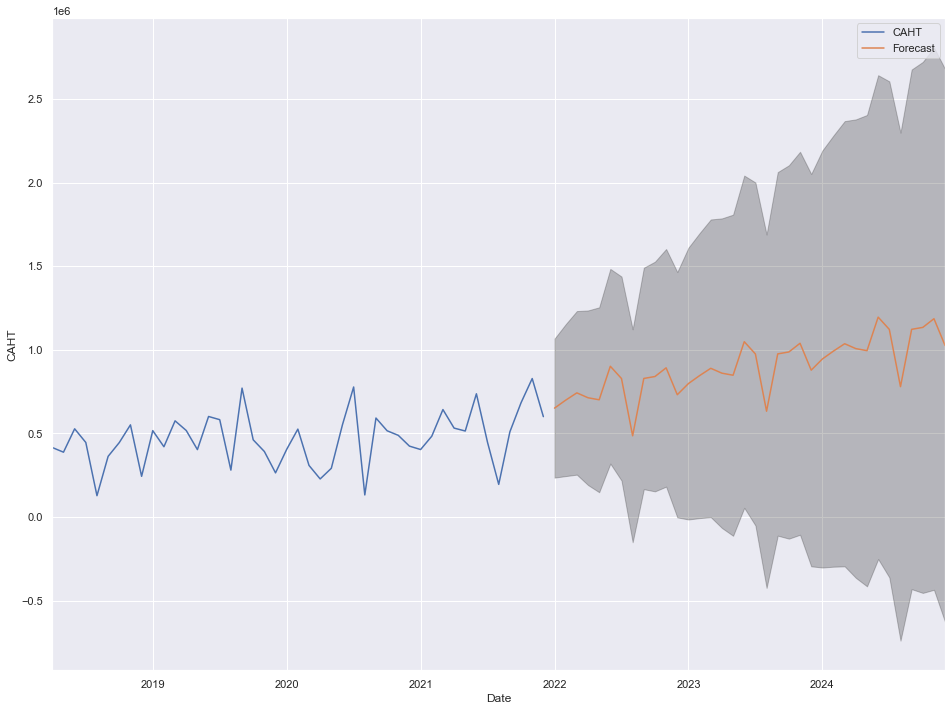

In [350]:
years = 3
pred_uc = results.get_forecast(steps=12 * years)
pred_ci = pred_uc.conf_int()
ax = df_entete.plot(label='observed', figsize=(16, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CAHT')
plt.legend()
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_5y.png')
plt.close()

# ALU

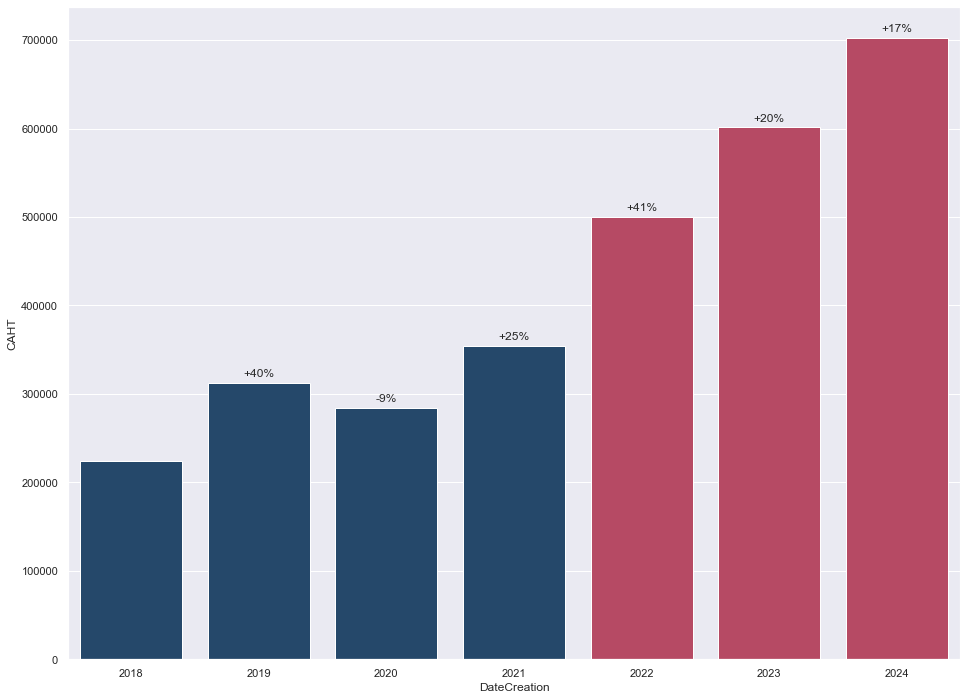

In [410]:
df_real = df_entete_alu.reset_index()

df_predict = results_alu.get_forecast(steps=36).predicted_mean.reset_index()
df_predict = df_predict.rename(columns={"index": "DateCreation", "predicted_mean": "CAHT"})

df_total = df_real.append(df_predict, ignore_index=True)
df_total["DateCreation"] = df_total["DateCreation"].apply(lambda x: x.year)
df_total = df_total.groupby("DateCreation").mean().reset_index()

sns.set(rc={'figure.figsize':(16, 12)})
colors = ['#194876' if (x <= 2021) else '#c8385b' for x in df_total["DateCreation"]]
plot = sns.barplot(data=df_total, x="DateCreation", y="CAHT", color="orange", palette=colors)

for x in range(len(plot.patches) - 1):
    x += 1
    label = round(-(1 - round(plot.patches[x].get_height() / plot.patches[x - 1].get_height(), 2)) * 100)
    label = "{0:+.0f}".format(label)
    label = f"{label}%"

    plot.annotate(
        format(label),
        (plot.patches[x].get_x() + plot.patches[x].get_width() / 2., plot.patches[x].get_height()),
        ha='center', va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

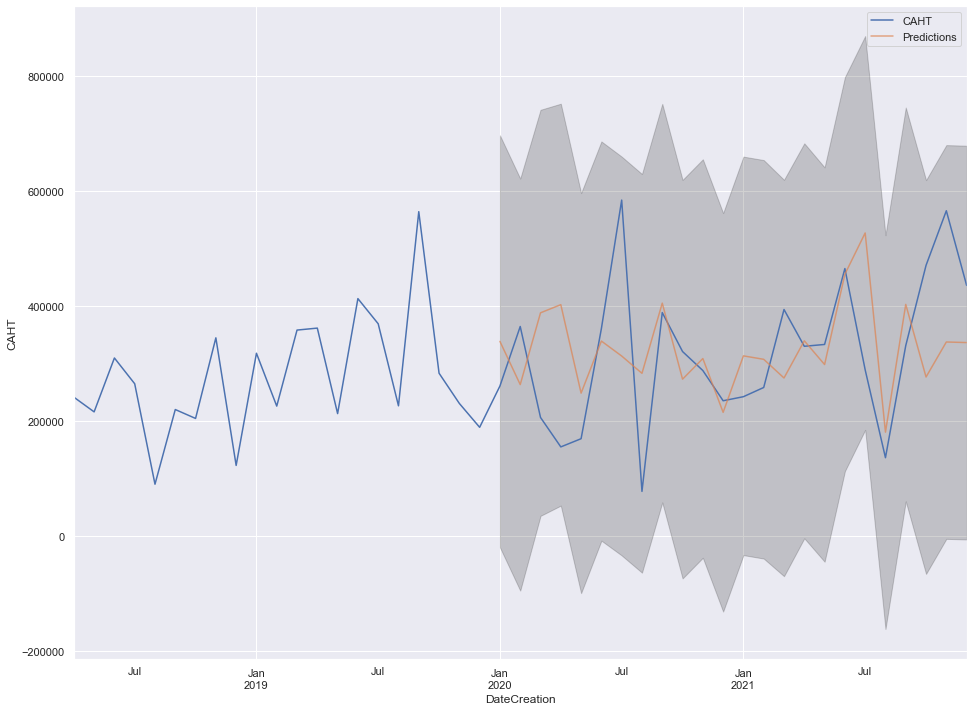

In [351]:
start_forecast = 21
pred = results_alu.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = df_entete_alu.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('DateCreation')
ax.set_ylabel('CAHT')
plt.legend()

plt.show()

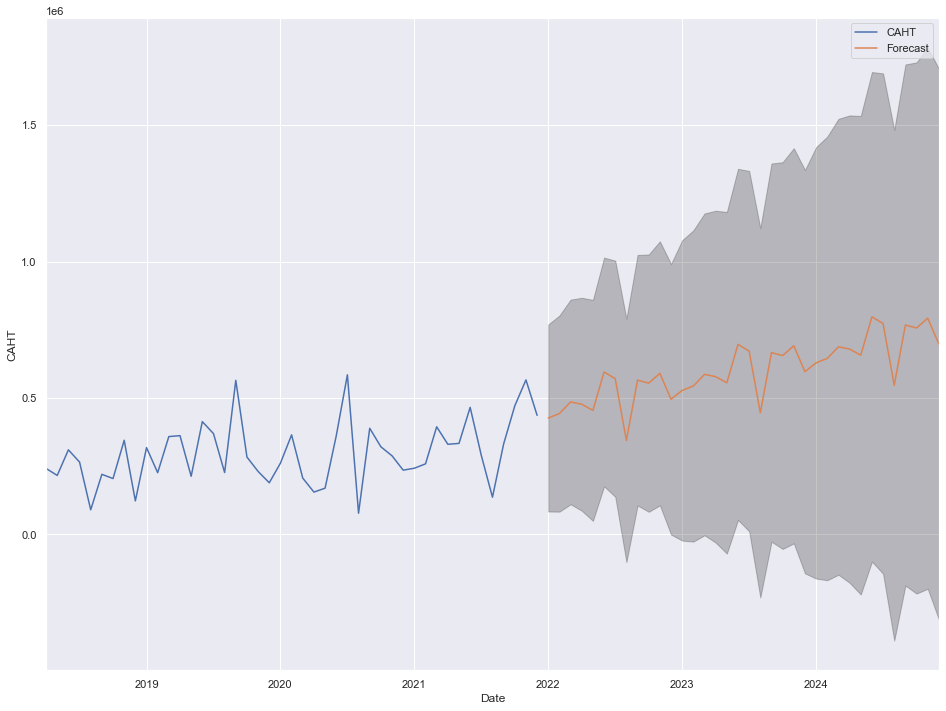

In [375]:
years = 3
pred_uc = results_alu.get_forecast(steps=12 * years)
pred_ci = pred_uc.conf_int()
ax = df_entete_alu.plot(label='observed', figsize=(16, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CAHT')
plt.legend()
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_5y.png')
plt.close()

# BOIS

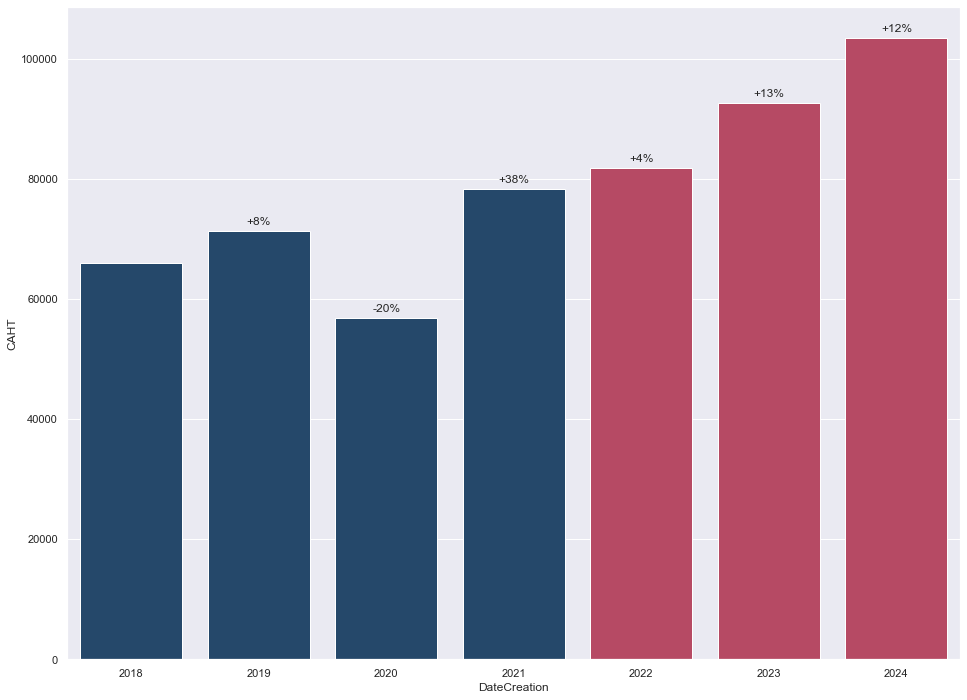

In [409]:
df_real = df_entete_bois.reset_index()

df_predict = results_bois.get_forecast(steps=36).predicted_mean.reset_index()
df_predict = df_predict.rename(columns={"index": "DateCreation", "predicted_mean": "CAHT"})

df_total = df_real.append(df_predict, ignore_index=True)
df_total["DateCreation"] = df_total["DateCreation"].apply(lambda x: x.year)
df_total = df_total.groupby("DateCreation").mean().reset_index()

sns.set(rc={'figure.figsize':(16, 12)})
colors = ['#194876' if (x <= 2021) else '#c8385b' for x in df_total["DateCreation"]]
plot = sns.barplot(data=df_total, x="DateCreation", y="CAHT", color="orange", palette=colors)

for x in range(len(plot.patches) - 1):
    x += 1
    label = round(-(1 - round(plot.patches[x].get_height() / plot.patches[x - 1].get_height(), 2)) * 100)
    label = "{0:+.0f}".format(label)
    label = f"{label}%"

    plot.annotate(
        format(label),
        (plot.patches[x].get_x() + plot.patches[x].get_width() / 2., plot.patches[x].get_height()),
        ha='center', va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

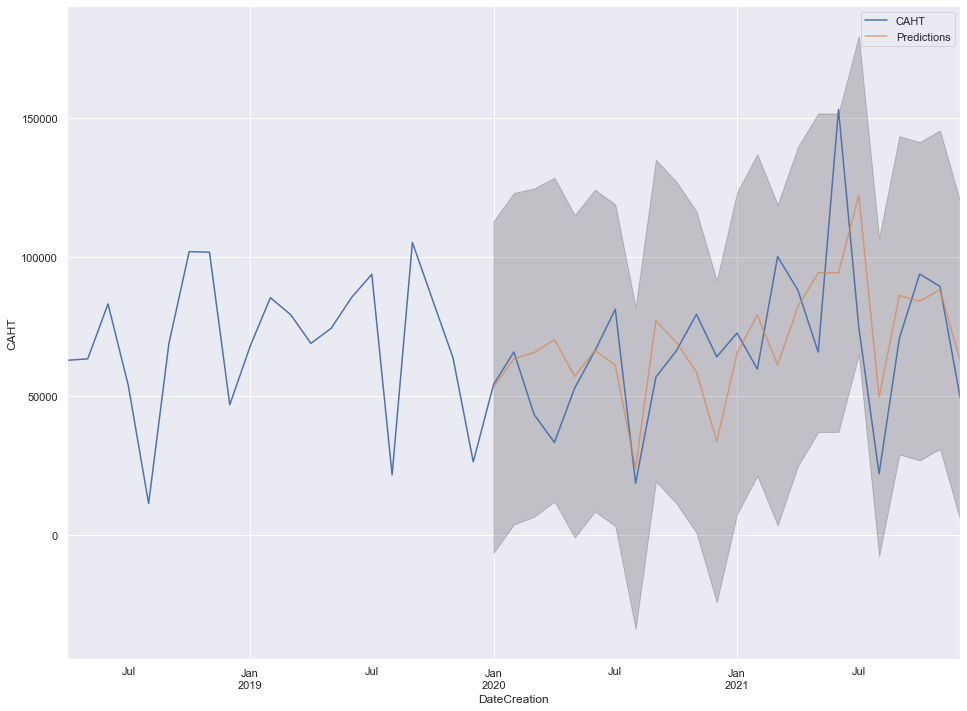

In [353]:
start_forecast = 21
pred = results_bois.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = df_entete_bois.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('DateCreation')
ax.set_ylabel('CAHT')
plt.legend()

plt.show()

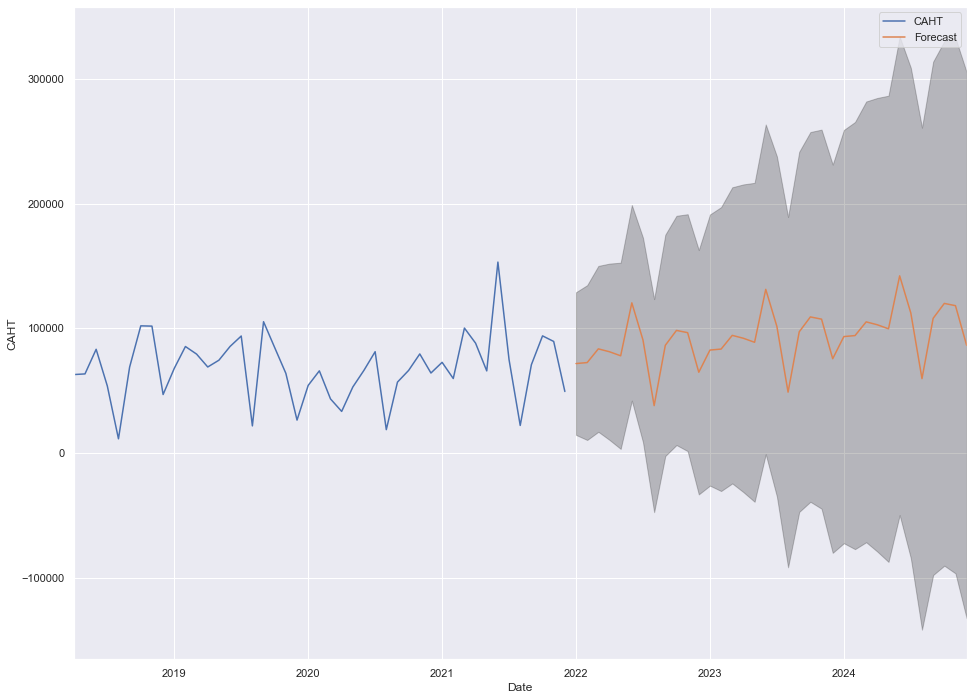

In [354]:
years = 3
pred_uc = results_bois.get_forecast(steps=12 * years)
pred_ci = pred_uc.conf_int()
ax = df_entete_bois.plot(label='observed', figsize=(16, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CAHT')
plt.legend()
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_5y.png')
plt.close()

# PVC

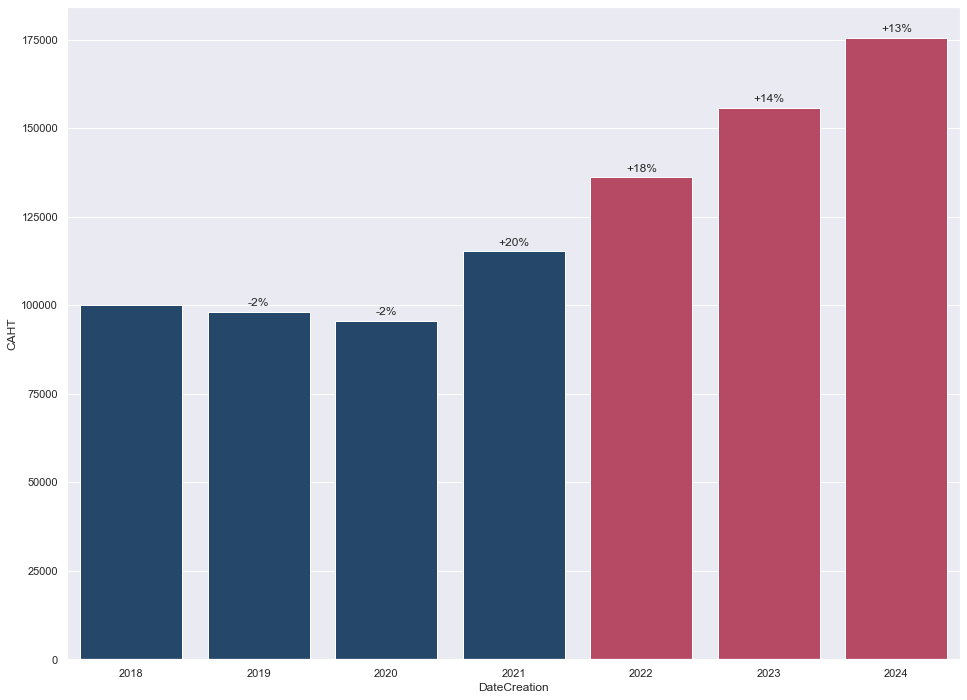

In [408]:
df_real = df_entete_pvc.reset_index()

df_predict = results_pvc.get_forecast(steps=36).predicted_mean.reset_index()
df_predict = df_predict.rename(columns={"index": "DateCreation", "predicted_mean": "CAHT"})

df_total = df_real.append(df_predict, ignore_index=True)
df_total["DateCreation"] = df_total["DateCreation"].apply(lambda x: x.year)
df_total = df_total.groupby("DateCreation").mean().reset_index()

sns.set(rc={'figure.figsize':(16, 12)})
colors = ['#194876' if (x <= 2021) else '#c8385b' for x in df_total["DateCreation"]]
plot = sns.barplot(data=df_total, x="DateCreation", y="CAHT", color="orange", palette=colors)

for x in range(len(plot.patches) - 1):
    x += 1
    label = round(-(1 - round(plot.patches[x].get_height() / plot.patches[x - 1].get_height(), 2)) * 100)
    label = "{0:+.0f}".format(label)
    label = f"{label}%"

    plot.annotate(
        format(label),
        (plot.patches[x].get_x() + plot.patches[x].get_width() / 2., plot.patches[x].get_height()),
        ha='center', va='center',
        xytext=(0, 9),
        textcoords='offset points'
    )

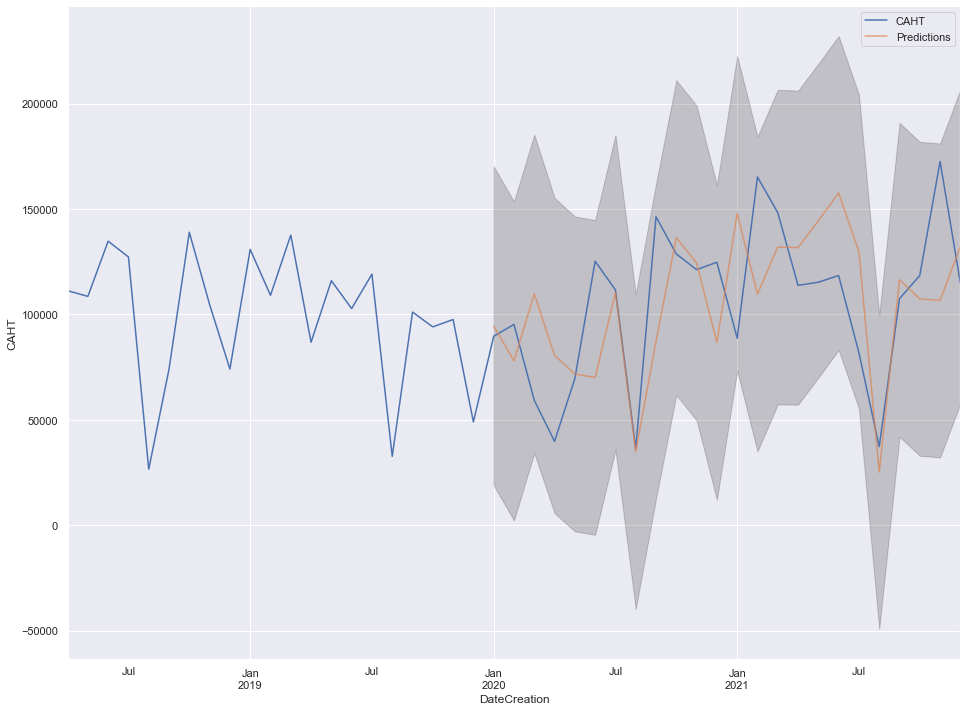

In [355]:
start_forecast = 21
pred = results_pvc.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = df_entete_pvc.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('DateCreation')
ax.set_ylabel('CAHT')
plt.legend()

plt.show()

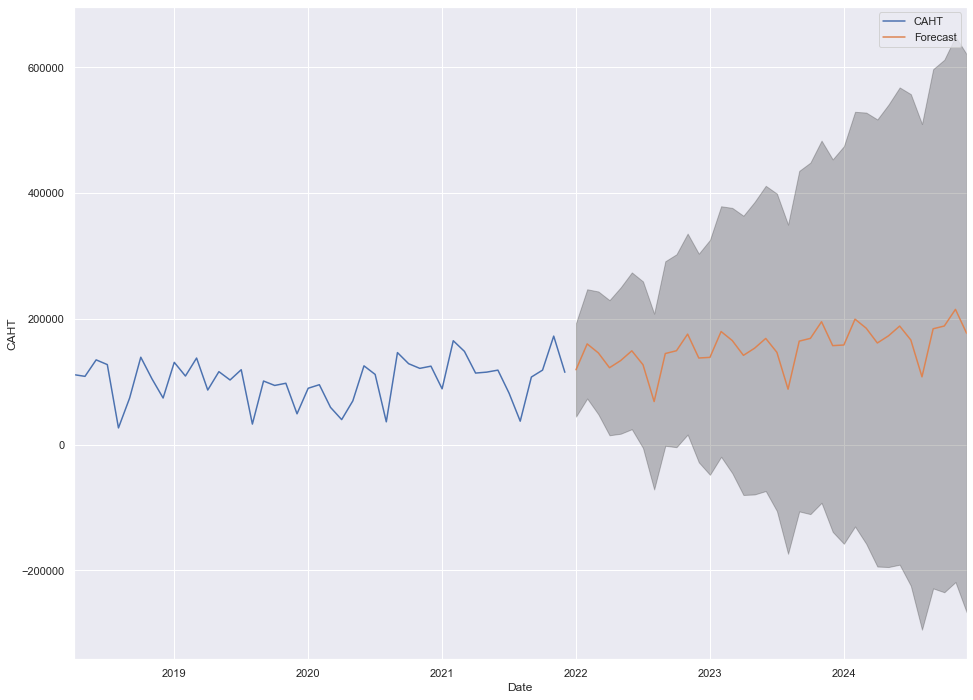

In [356]:
years = 3
pred_uc = results_pvc.get_forecast(steps=12 * years)
pred_ci = pred_uc.conf_int()
ax = df_entete_pvc.plot(label='observed', figsize=(16, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CAHT')
plt.legend()
plt.show()
#plt.savefig(current_dir + os.sep + 'SARIMAX_FORECAST_5y.png')
plt.close()